In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
folder_path = "datasets" 
excel_files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]

In [2]:
excel_files

['dataset4.xlsx',
 'dataset5.xlsx',
 'dataset6.xlsx',
 'dataset7.xlsx',
 'dataset8.xlsx',
 'dataset9.xlsx',
 'dataset_1_2_3_combined.xlsx']

In [3]:
dataframes = {}
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    dataframes[file] = pd.read_excel(file_path)
    print(f"Loaded {file} with shape {dataframes[file].shape}")
combined_df = pd.concat(dataframes.values(), ignore_index=True)

Loaded dataset4.xlsx with shape (500, 8)
Loaded dataset5.xlsx with shape (200, 8)
Loaded dataset6.xlsx with shape (200, 8)
Loaded dataset7.xlsx with shape (200, 8)
Loaded dataset8.xlsx with shape (200, 8)
Loaded dataset9.xlsx with shape (200, 8)
Loaded dataset_1_2_3_combined.xlsx with shape (1674, 8)


In [4]:
combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
combined_df['length_of_transcript'] = combined_df['Transcript'].apply(lambda x: len(x))
combined_df

C:\Users\Rishy\AppData\Local\Temp\ipykernel_17580\1465236243.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript
0,uppaup1,alice smith,software engineer,here's a simulated interview for a software en...,here's a sample resume for alice smith:\n\n**a...,rejected,unsatisfactory references or background check.,here is a comprehensive job description for a ...,3342
1,uppaup2,hank brown,software engineer,here's a simulated interview for a software en...,"here's a resume for hank brown, a selected can...",selected,growth mindset and adaptability.,here is a job description for a software engin...,5201
2,uppaup3,bob jones,data scientist,here's a simulated interview for a data scient...,"here's a sample resume for bob jones, who appl...",rejected,inadequate communication or interpersonal skills.,here is a comprehensive job description for a ...,2977
3,uppaup4,bob miller,software engineer,here's a simulated interview for a software en...,"here's a sample resume for bob miller, a softw...",selected,strong cultural fit.,here is a sample job description for a softwar...,4331
4,uppaup5,ivy jones,data engineer,here's a simulated interview for a data engine...,here's a sample resume for ivy jones:\n\n**ivy...,rejected,lack of relevant skills or experience.,here is a sample job description for a data en...,3527
...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here's a realistic interview transcript for th...,ananya bansal\ncontact information:\n\n* phone...,select,experience gap,\n we are seeking a qualified data engi...,4858
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information:\n\n* email: [...,reject,business acumen,\n we are seeking a qualified product m...,4667
3171,harska507,harshitha kapoor,ui engineer,"interviewer: hi harshitha, thanks for coming i...",harshitha kapoor\nui engineer\n\ncontact infor...,select,cultural fit,\n we are seeking a qualified ui engine...,5600
3172,kabich225,kabir chopra,software engineer,here's a realistic interview transcript for ka...,kabir chopra\ncontact information:\n\n* email:...,reject,technical knowledge,\n we are seeking a qualified software ...,5222


In [5]:
combined_df['decision'] = combined_df['decision'].replace({
    'reject': 'rejected',
    'select': 'selected'
})
result = combined_df[['length_of_transcript', 'decision']].groupby('decision').mean()
print(result)

          length_of_transcript
decision                      
rejected           3925.531386
selected           4657.431310


In [6]:
combined_df['num_words_in_transcript'] = combined_df['Transcript'].apply(lambda x: len(str(x).split()))
combined_df[['num_words_in_transcript','decision','Role']].groupby(['Role','decision']).agg({'mean','median','std'})

num_words_in_transcript         \
                                                          std median   
Role                         decision                                  
ai engineer                  rejected               18.212633  555.0   
                             selected              204.121419  682.0   
business analyst             rejected              110.323615  578.0   
                             selected               54.802980  693.5   
cloud architect              rejected               76.906870  619.0   
                             selected               19.670197  796.5   
content writer               rejected               61.554854  532.0   
                             selected               30.405592  684.5   
cybersecurity specialist     rejected              123.835375  604.5   
                             selected               77.929455  671.0   
data analyst                 rejected              110.356261  685.0   
                             selected              109.459986  760.0   
data engineer                rejected              119.032443  625.5   
                             selected              128.361485  754.0   
data scientist               rejected              114.073092  646.0   
                             selected              133.971428  730.0   
database administrator       rejected               73.432509  571.0   
                             selected               87.793887  732.5   
devops engineer              rejected               61.727223  621.0   
                             selected               49.273510  700.0   
digital marketing specialist rejected               43.657760  627.0   
                             selected               72.875083  694.0   
game developer               rejected              179.199144  537.0   
                             selected              311.369020  302.0   
graphic designer             rejected               61.207930  530.5   
                             selected               63.439510  676.0   
hr specialist                rejected               66.817413  646.5   
                             selected               94.219779  729.5   
machine learning engineer    rejected              100.349390  617.5   
                             selected               72.034053  845.0   
mobile app developer         rejected               88.803153  609.5   
                             selected               11.372481  646.0   
network engineer             rejected               92.458699  516.0   
                             selected               60.419171  799.0   
product manager              rejected              113.258956  619.0   
                             selected              128.642947  766.0   
project manager              rejected               92.922439  677.0   
                             selected               82.964084  735.5   
software developer           rejected              126.307029  685.0   
                             selected               85.288800  691.0   
software engineer            rejected              151.507240  616.0   
                             selected              145.155873  726.0   
system administrator         rejected               48.280431  574.0   
                             selected                7.778175  761.5   
ui designer                  rejected              124.724961  728.0   
                             selected              108.505000  766.0   
ui engineer                  rejected              106.778295  561.5   
                             selected              161.257155  694.0   
ui/ux designer               rejected               65.199693  505.0   
                             selected               53.618249  739.0   

                                                   
                                             mean  
Role                         decision              
ai engineer                  rejected  567.200000  
             

In [8]:
combined_df.to_excel('datas1.xlsx',index=False)


TF-IDF Features for Transcripts:
   000  00f   02  030   05   08  085   10  100  1000  ...  zones  zookeeper  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   

   zoom  zooming  zoya  zoyas  zscore  λw1  λw22  πr2  
0   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
1   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
2   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
3   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
4   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  

[5 rows x 11476 columns]

TF-IDF Features for Job Descriptions:
   000  00f   02  030   05   08  085   10  100  1000  ...  zones  zookeeper  \
0  0.0  0.0

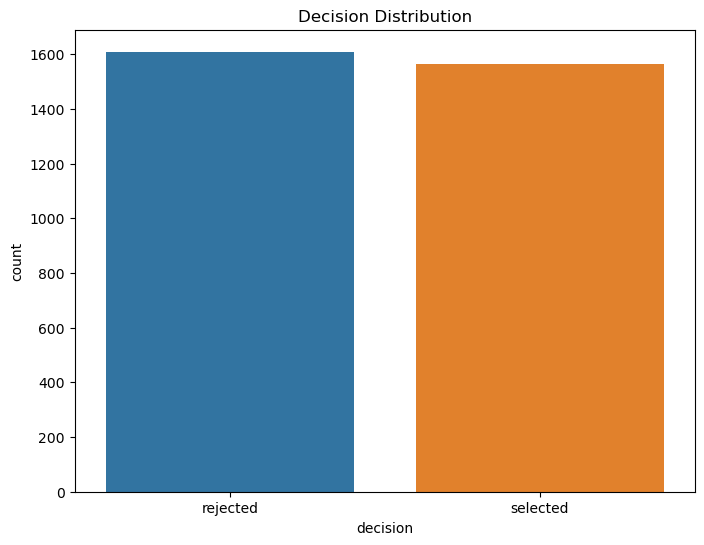

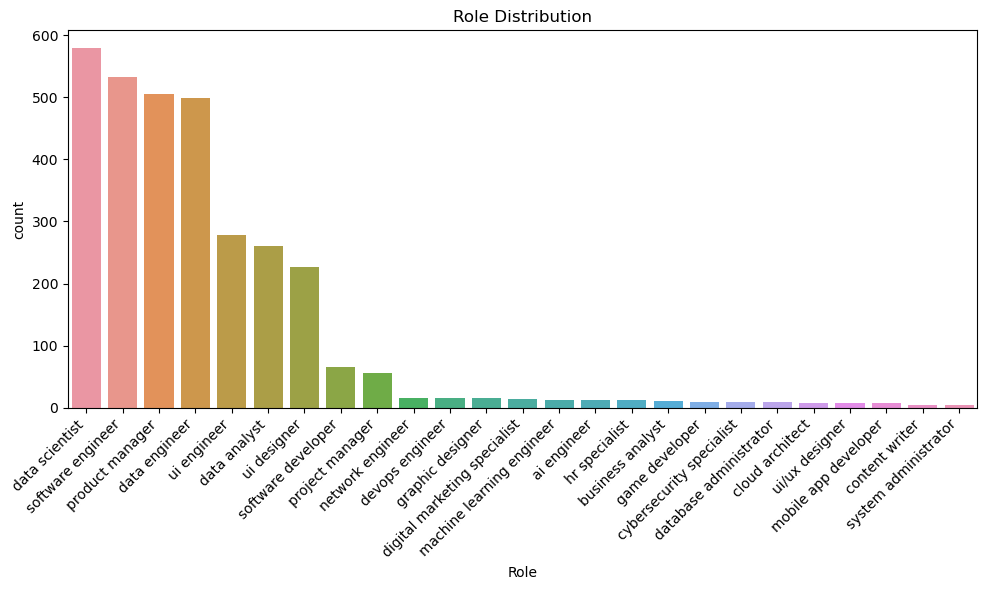

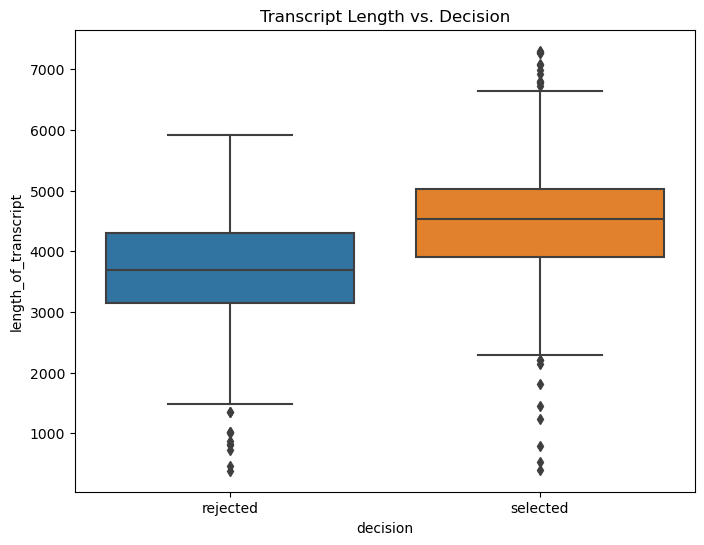

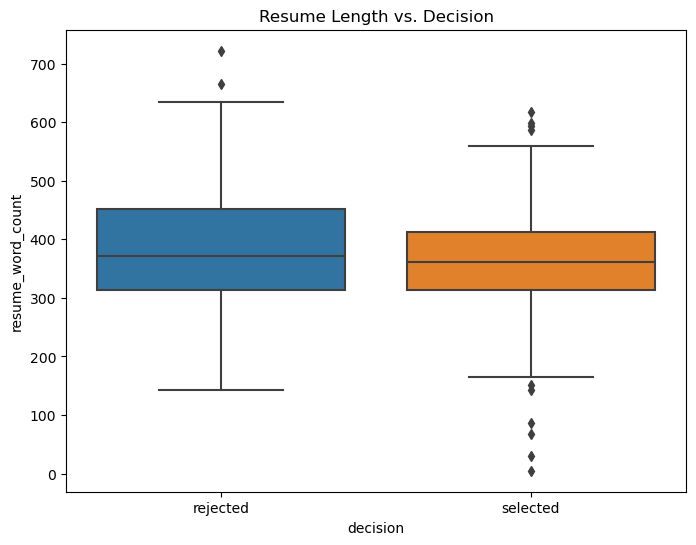

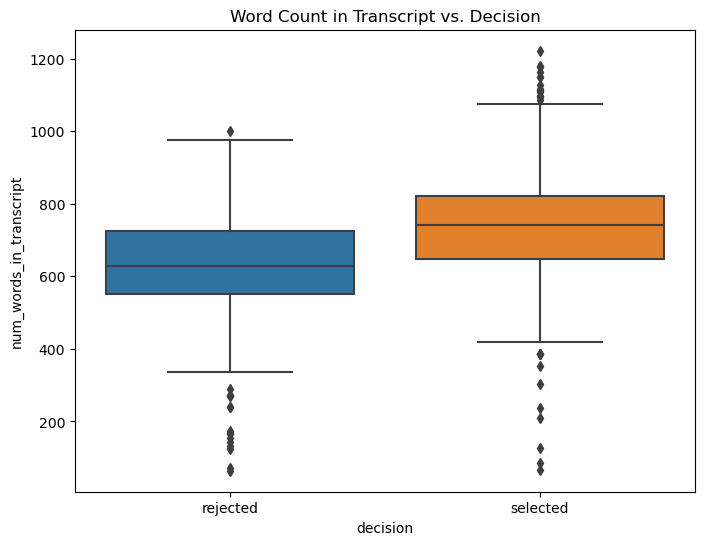

No data available for Selected Candidates top words.


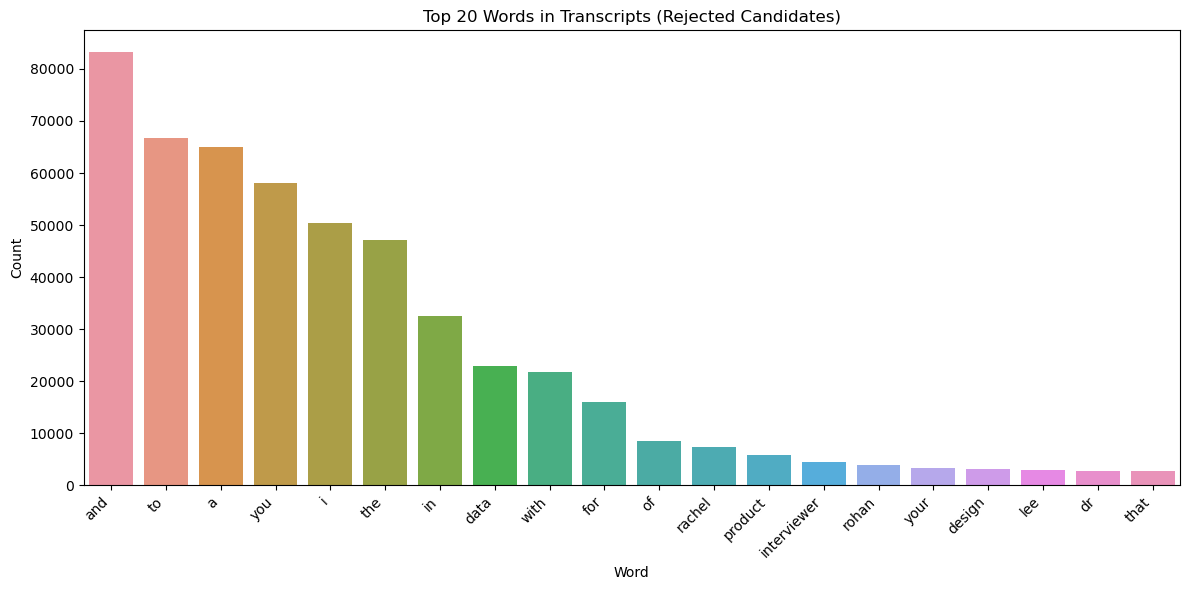

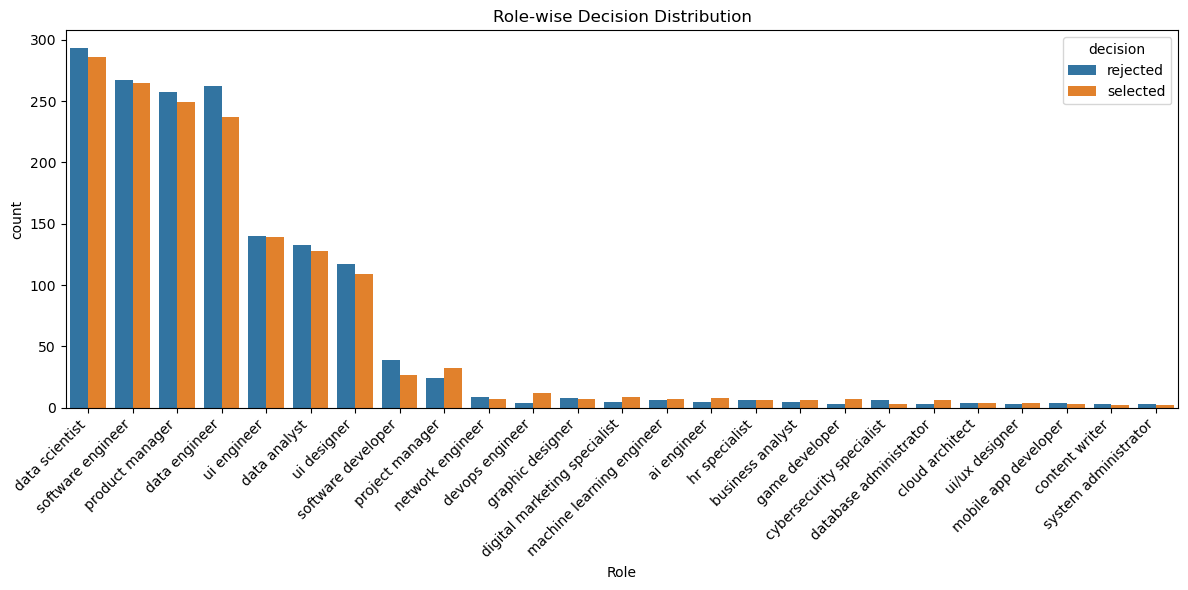

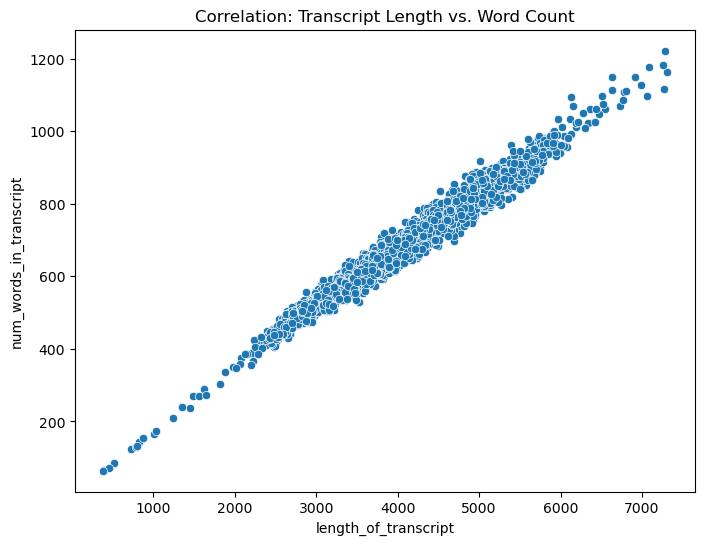


Original DataFrame with additional features:
        ID         Name               Role  \
0  uppaup1  alice smith  software engineer   
1  uppaup2   hank brown  software engineer   
2  uppaup3    bob jones     data scientist   
3  uppaup4   bob miller  software engineer   
4  uppaup5    ivy jones      data engineer   

                                          Transcript  \
0  heres a simulated interview for a software eng...   
1  heres a simulated interview for a software eng...   
2  heres a simulated interview for a data scienti...   
3  heres a simulated interview for a software eng...   
4  heres a simulated interview for a data enginee...   

                                              Resume  decision  \
0  heres a sample resume for alice smith\n\nalice...  rejected   
1  heres a resume for hank brown a selected candi...  selected   
2  heres a sample resume for bob jones who applie...  rejected   
3  heres a sample resume for bob miller a softwar...  selected   
4  heres a

In [9]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_excel("datas1.xlsx")
def clean_text(text):
    if isinstance(text, str):  # handle potential NaN values
        text = re.sub(r'[^\w\s]', '', text).lower()  # remove punctuation and lowercase
        return text
    else:
        return ""
for col in ['Transcript', 'Resume', 'Job Description', 'Reason for decision']:
    df[col] = df[col].apply(clean_text)
    
#Text Length and Word Count
df['length_of_transcript'] = df['Transcript'].str.len()
df['num_words_in_transcript'] = df['Transcript'].str.split().str.len()
df['resume_word_count'] = df['Resume'].str.split().str.len()

#Common Words (in transcripts)
def common_words(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

df['top_transcript_words'] = df['Transcript'].apply(lambda x: common_words(x))

#TF-IDF for Text Data (Transcript and Job Description)
tfidf = TfidfVectorizer(stop_words='english')

combined_text_data = df['Transcript'].tolist() + df['Job Description'].tolist()
tfidf.fit(combined_text_data)

transcript_tfidf = tfidf.transform(df['Transcript'])
job_desc_tfidf = tfidf.transform(df['Job Description'])

tfidf_df_transcript = pd.DataFrame(transcript_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df_job_desc = pd.DataFrame(job_desc_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print("\nTF-IDF Features for Transcripts:")
print(tfidf_df_transcript.head())

print("\nTF-IDF Features for Job Descriptions:")
print(tfidf_df_job_desc.head())

#EDA

plt.figure(figsize=(8, 6))
sns.countplot(x='decision', data=df)
plt.title('Decision Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Role', data=df, order=df['Role'].value_counts().index)  # sort by count
plt.xticks(rotation=45, ha='right')
plt.title('Role Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='length_of_transcript', data=df)
plt.title('Transcript Length vs. Decision')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='resume_word_count', data=df)
plt.title('Resume Length vs. Decision')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='num_words_in_transcript', data=df)
plt.title('Word Count in Transcript vs. Decision')
plt.show()

# 6. Top Words in Transcripts by Decision
selected_words = Counter()
rejected_words = Counter()
for index, row in df.iterrows():
    top_words_list = row['top_transcript_words']
    if row['decision'] == 'Selected':
        for word, count in top_words_list:
            selected_words[word] += count
    else:
        for word, count in top_words_list:
            rejected_words[word] += count

selected_words_df = pd.DataFrame(selected_words.most_common(20), columns=['Word', 'Count'])
rejected_words_df = pd.DataFrame(rejected_words.most_common(20), columns=['Word', 'Count'])

#Check if DataFrame is not empty before plotting
if not selected_words_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Count', data=selected_words_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Words in Transcripts (Selected Candidates)')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for Selected Candidates top words.")

if not rejected_words_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Count', data=rejected_words_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Words in Transcripts (Rejected Candidates)')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for Rejected Candidates top words.")

plt.figure(figsize=(12, 6))
sns.countplot(x='Role', hue='decision', data=df, order=df['Role'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Role-wise Decision Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='length_of_transcript', y='num_words_in_transcript', data=df)
plt.title('Correlation: Transcript Length vs. Word Count')
plt.show()

print("\nOriginal DataFrame with additional features:")
print(df.head())